In [2]:
import math
import datetime, time
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

year frac =  1.002053388090349
[*********************100%***********************]  1 of 1 completed
tau =  0.0004008213552361396
2500


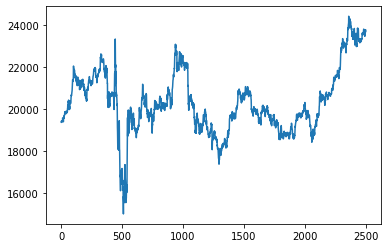

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,19240.0,19400.0,19140.0,19378.0,19378.0,19962
2020-01-03,19378.0,19438.0,19356.0,19436.0,19436.0,47944
2020-01-03,19434.0,19472.0,19390.0,19408.0,19408.0,32890
2020-01-03,19410.0,19442.0,19400.0,19410.0,19410.0,14276
2020-01-03,19418.0,19456.0,19406.0,19440.0,19440.0,9904
...,...,...,...,...,...,...
2020-12-30,23590.0,23660.0,23562.0,23632.0,23632.0,16114
2020-12-30,23638.0,23686.0,23620.0,23662.0,23662.0,23674
2020-12-30,23664.0,23754.0,23648.0,23754.0,23754.0,24762


In [55]:
ticker = "GMKN.ME"
strt = "2020-01-01"
endt = "2021-01-01"
intrvl = "1h"
format = '%Y-%m-%d'
dtstrt = datetime.datetime.strptime(strt, format)
dtendt = datetime.datetime.strptime(endt, format)
time_delta = dtendt-dtstrt
time_marshall_as_year = time_delta.total_seconds() / 365.25 / 86400
print("year frac = ", time_marshall_as_year)

data = yf.download(ticker, start=strt, end=endt, interval=intrvl)
tau = time_marshall_as_year / len(data['Adj Close'])
print("tau = ", tau)
ticks = np.arange(1,len(data['Adj Close'])+1)
print(len(ticks))
plt.plot(ticks, data['Adj Close'])
plt.show()
data

tau =  0.0004008213552361396
the whole exp_time = 1.002053388090349
mu = 0.2007556263504121
sigma2 =  0.3788249247283477
lenlog 2500


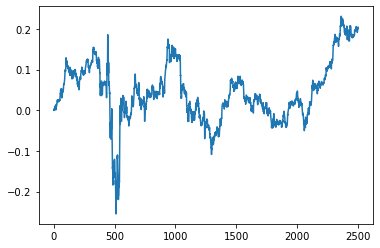

In [56]:
np_data = data['Adj Close']
#print(np_data)

log_data = np.zeros(len(np_data))
div = np_data[0]
#print(len(np_data))

#for i in range(1,len(np_data)):
#    log_data[i] = np.log(np_data[i] / np_data[i-1])

log_data = np.log(np_data / div)
#print(log_data)

XT = log_data[len(log_data)-1]
mean = XT / len(log_data)
var = 0
var2 = 0
for i in range(1, len(log_data)):
    var += (log_data[i] - log_data[i-1] - mean) * (log_data[i] - log_data[i-1] - mean)
    var2 += (log_data[i] - log_data[i-1]) * (log_data[i] - log_data[i-1])
var /= len(log_data) - 1
var2 /= (len(log_data) - 1) * tau

print("tau = ", tau)
print("the whole exp_time =",time_marshall_as_year)
print("mu =", XT/time_marshall_as_year)
#print("var = ", var / tau)
print("sigma2 = ", math.sqrt(var2))
print("lenlog", len(log_data))
plt.plot(np.arange(1, len(log_data)+1),log_data)
plt.show()